Case de IA


-lugares com preço de combustivel mais alto vende mais ou menos?
feriado vende mais ou menos?
Lugares com maior indice de desemprego - pessoas compram menos


1. Entendimento do problema
a. Qual é o problema? Qual a causa (ou possível causa)?
b. Por que resolver?
c. Qual pode ser uma boa métrica para avaliação do sucesso?
2. Entendimento dos dados
a. Quais os dados disponíveis e que informações podemos tirar deles?
b. Qual a variável target?
3. Pré-processamento
a. Limpeza de dados
b. Criação de outras variáveis
c. Normalização
d. Padronização
e. Lidar com outliers
f. Valores faltantes
4. Modelagem
a. Seleção, treinamento e teste de um algoritmo
b. Tunagem de hiperparâmetros
c. Documentar motivo da escolha
5. Avaliação
a. Analisar as métricas
b. Formular hipóteses de como o seu modelo poderia melhorar e iterar
(documentar essas hipóteses

1. Importando Bibliotecas


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

2. Limpeza e Tratamento Dados


In [2]:
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')
features=pd.read_csv('features data set.csv')

In [3]:
#df de sales
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
#merge na stores e sales pelo store
df=pd.merge(sales,stores,on='Store',how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
#merge na features
df=pd.merge(df,features,on=['Date','Store','IsHoliday'],how='inner')
df.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [7]:
#dropou linhas
df.isna()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#não faz sentido ter info do tamanho da loja 
#já que o A é para lojas grandes e o B para lojas pequenas
#vamos doprar essa coluna
df.drop(columns='Size',inplace=True)
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [9]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
df.head(1000)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,72,07/05/2010,39104.10,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
996,1,74,07/05/2010,11805.33,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
997,1,78,07/05/2010,12.00,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
998,1,79,07/05/2010,44039.92,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808


In [11]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]


MarkDown2       0.736110
MarkDown4       0.679847
MarkDown3       0.674808
MarkDown1       0.642572
MarkDown5       0.640790
Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Type            0.000000
Temperature     0.000000
Fuel_Price      0.000000
CPI             0.000000
Unemployment    0.000000
dtype: float64

In [12]:

# Contar linhas com NaN usando isna()
total_linhas_com_nan = df.isna().any(axis=1).sum()

# Exibir o número total de linhas com NaN
#total_linhas_com_nan = len(linhas_com_nan[linhas_com_nan > 0])
total_linhas=len(df)
porc=round((total_linhas_com_nan/total_linhas)*100,2)
print(f"Número de linhas com NaN: {total_linhas_com_nan}, a porcentagem: {porc}%")

Número de linhas com NaN: 324514, a porcentagem: 76.98%


In [13]:
from sklearn.impute import SimpleImputer


In [14]:
#Instantiate SimpleImputer 
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(df[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4']])
  
#Filling missing data with median
df[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4']] = si.transform(df[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4']])

In [15]:
#criar colunas de mês e ano
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [16]:
#df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
#df['MarkDown2'] = df['MarkDown2'].fillna(df['MarkDown2'].mean())
#df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].mean())
#df['MarkDown4'] = df['MarkDown4'].fillna(df['MarkDown4'].mean())

In [17]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
1,1,2,2010-02-05,50605.27,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
2,1,3,2010-02-05,13740.12,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
3,1,4,2010-02-05,39954.04,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
4,1,5,2010-02-05,32229.38,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2


Como temos mais que 76% dos dados tem Nan não vamos dropar essas linhas


3. Análise

In [18]:
#tem até 99 tipos de departamentos - a loja de store 1, pode ser do departamento 1,2,3,..., ou 99
df['Dept'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [19]:
#só 2010,11,12
df['Year'].unique()

array([2010, 2011, 2012])

In [20]:
#45 ids de lojas
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [21]:
df[(df['Store']==1)&(df['Dept']==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,5347.45,192.00,24.60,1481.31,NaN,211.096358,8.106,2010,2
73,1,1,2010-02-12,46039.49,True,A,38.51,2.548,5347.45,192.00,24.60,1481.31,NaN,211.242170,8.106,2010,2
145,1,1,2010-02-19,41595.55,False,A,39.93,2.514,5347.45,192.00,24.60,1481.31,NaN,211.289143,8.106,2010,2
218,1,1,2010-02-26,19403.54,False,A,46.63,2.561,5347.45,192.00,24.60,1481.31,NaN,211.319643,8.106,2010,2
290,1,1,2010-03-05,21827.90,False,A,46.50,2.625,5347.45,192.00,24.60,1481.31,NaN,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1,1,2012-09-28,18947.81,False,A,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,2012,9
9956,1,1,2012-10-05,21904.47,False,A,68.55,3.617,8077.89,192.00,18.22,3617.43,3626.14,223.181477,6.573,2012,10
10028,1,1,2012-10-12,22764.01,False,A,62.99,3.601,2086.18,192.00,8.11,602.36,5926.45,223.381296,6.573,2012,10
10101,1,1,2012-10-19,24185.27,False,A,67.97,3.594,950.33,192.00,4.93,80.25,2312.85,223.425723,6.573,2012,10


In [22]:
#tirar date
df_without_date=df.drop(columns=['Date','Type']) 


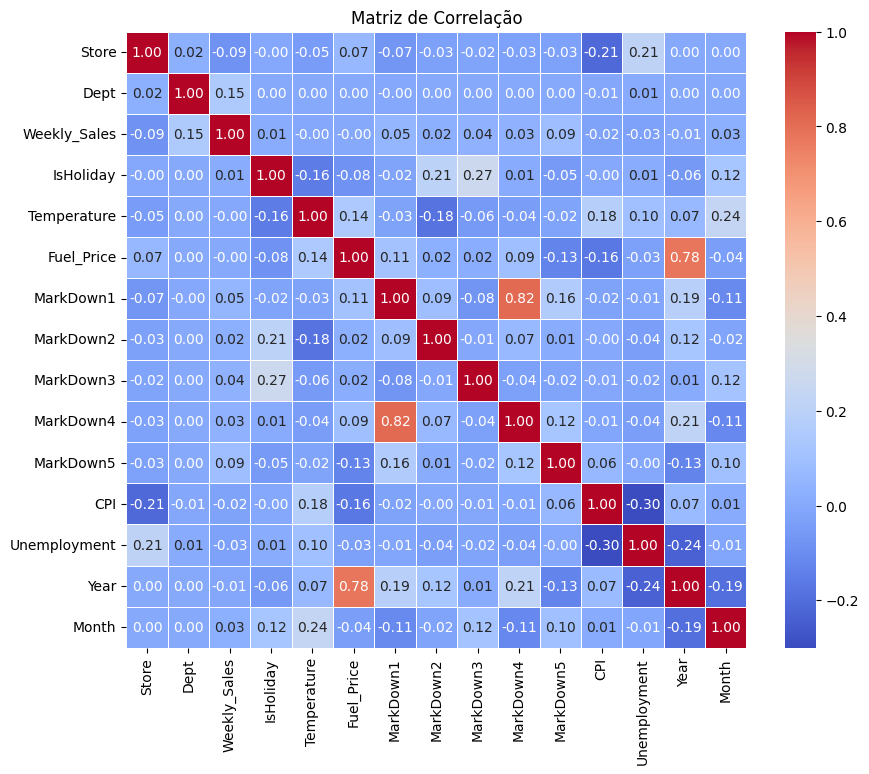

In [23]:
#correlação
correlacao = df_without_date.corr()

# Cria um mapa de calor (heatmap) usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

correlação maior entre o preço do combustível e o ano

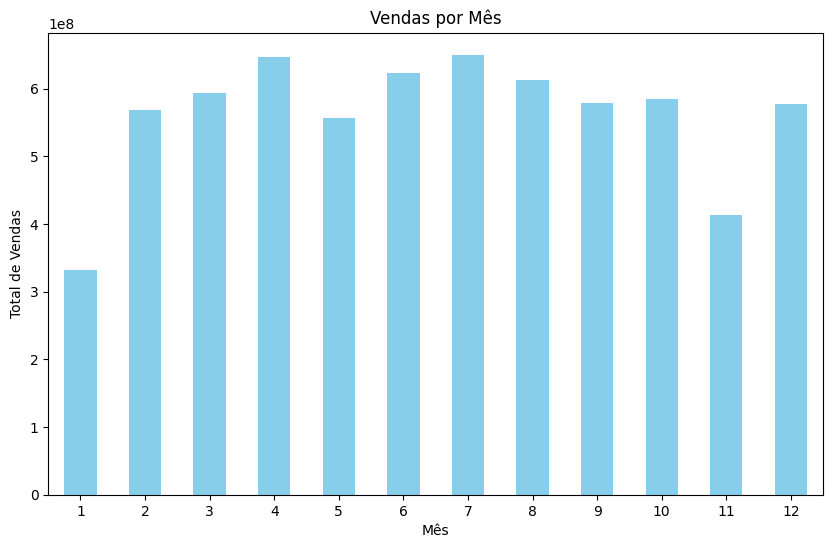

In [24]:
#vamo ver qual mês tem mais vendas semanais
vendas_por_mes = df.groupby('Month')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

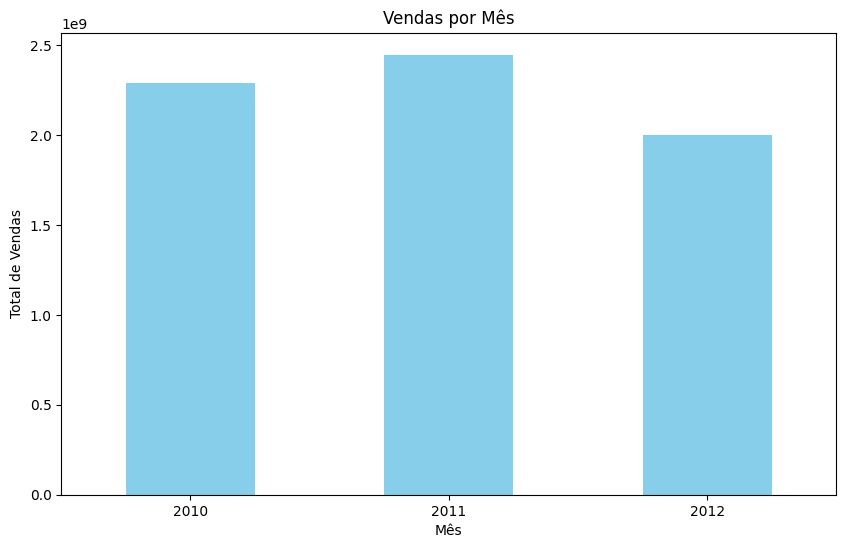

In [25]:
#vamo ver qual ano tem mais vendas semanais
vendas_por_mes = df.groupby('Year')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

In [26]:
#diferença da média de venda quando é feriado ou não
media_por_feriado = df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Exiba os resultados
print(media_por_feriado)

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


In [27]:
#quais são os feriados que tem?
feriados = df[df['IsHoliday'] == True][['Date','Weekly_Sales']]


In [28]:
#qual feriado que vende mais?
vendas_por_feriado = feriados.groupby('Date')['Weekly_Sales'].sum()

feriado_mais_vendido = vendas_por_feriado.idxmax()
vendas_mais_altas = vendas_por_feriado.max()

In [29]:
print(vendas_mais_altas)

66593605.26


In [30]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
1,1,2,2010-02-05,50605.27,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
2,1,3,2010-02-05,13740.12,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
3,1,4,2010-02-05,39954.04,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2
4,1,5,2010-02-05,32229.38,False,A,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2


In [31]:
#pq inflação e desemprego não tiveram impacto na weekly_sales


In [32]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
dtype: object

In [33]:
#antes de lidar com a normalizaçao e padronização - vamos lidar com as variáveis categóricas
#Date,isholiday(is,not),type(ABC)
df_dummies=pd.get_dummies(df[['IsHoliday','Type']])

In [34]:
df_dummies=df_dummies.astype(int)

In [35]:
df.drop(columns=['Type','IsHoliday'],inplace=True)

In [36]:
df=pd.concat([df,df_dummies],axis=1)

In [37]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
1,1,2,2010-02-05,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
2,1,3,2010-02-05,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
3,1,4,2010-02-05,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
4,1,5,2010-02-05,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0


In [38]:
df_sem_data = df.drop(columns=['Date']).copy()

In [39]:
df_sem_data.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
1,1,2,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
2,1,3,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
3,1,4,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0
4,1,5,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0


In [40]:
#preencher valores nulos
#Preencher valores nulos com a média, mediana, etc.
#df_sem_data = df_sem_data.fillna(df_sem_data.mean()) 
# Remover linhas com valores nulos
#df_sem_nulos = df_sem_data.dropna()

Usar normalização ou padronização?(MinMaxScaler/StandardScaler)
normalização: if your data has outliers or does not follow a normal distribution, MinMaxScaler

Normalização:

Objetivo: Colocar os dados em uma escala comum, geralmente entre 0 e 1.
Como é feita: Cada valor é transformado de forma que fique entre 0 e 1, com base nos valores mínimo e máximo da coluna
 
Scikit-learn: MinMaxScaler é uma implementação comum para normalização.

Padronização:

Objetivo: Transformar os dados para que tenham uma média zero e um desvio padrão de um.
Como é feita: Cada valor é transformado subtraindo-se a média da coluna e dividindo pelo desvio padrão.
Scikit-learn: StandardScaler é uma implementação comum para padronização.

Text(0.5, 1.0, 'Histograma Antes da Normalização')

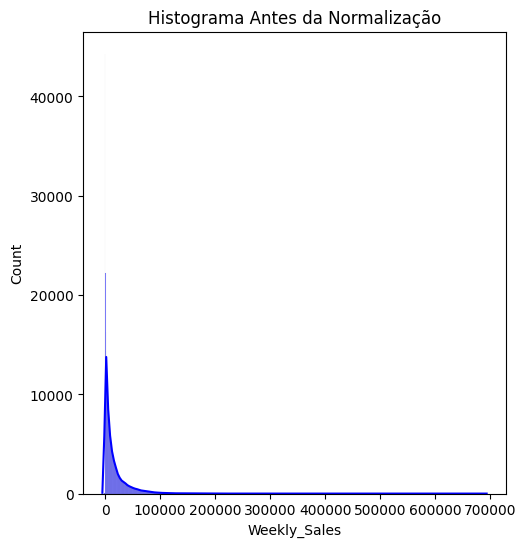

In [41]:
#1. ver a distribuição dos dados se é normal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True, color='blue', label='Original')
plt.title('Histograma Antes da Normalização')

In [42]:
#2. ver se tem bastante outliers ou não
#temos alguns jeitos

1. Boxplot:
O boxplot é uma visualização gráfica que representa a distribuição estatística dos dados.  
Outliers geralmente aparecem como pontos fora das "linhas de bigode" do boxplot.

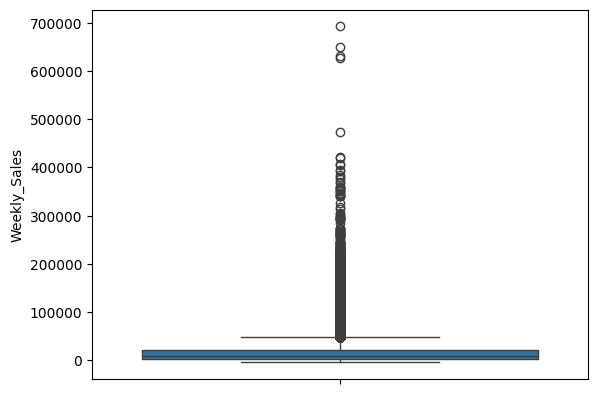

In [43]:
sns.boxplot(y=df['Weekly_Sales'],data=df)
plt.show()

2. Histograma:  
Um histograma pode ajudar a identificar a distribuição dos dados.  
Outliers podem se manifestar como barras isoladas longe da massa principal.

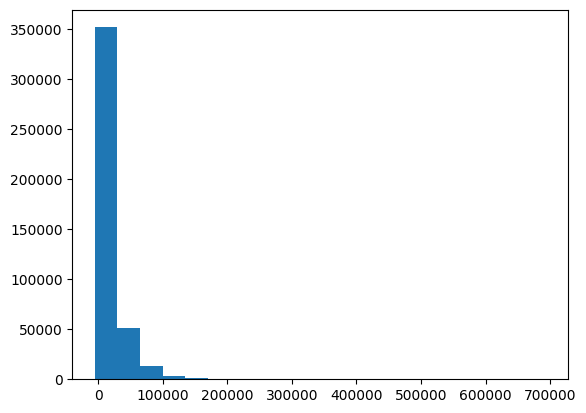

In [44]:
plt.hist(df['Weekly_Sales'],bins=20)
plt.show()

3. Scatter Plot:  
Em um scatter plot, pontos que se afastam do padrão podem ser outliers.  
Especialmente útil em dados bidimensionais.  

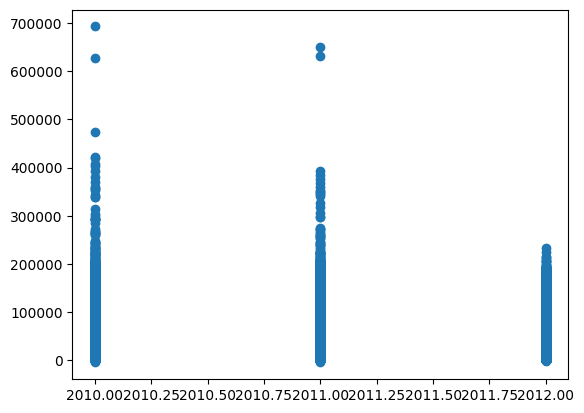

In [45]:
# Criar scatter plot
plt.scatter( df['Year'],df['Weekly_Sales'])
plt.show()
#nao mt bom para quando há mts dados

4. Z-Score:  
Calcular o Z-Score pode ajudar a identificar pontos que estão longe da média em termos de desvios padrão.

O Z-Score é uma medida estatística que indica o quão longe um ponto de dados está da média de um conjunto de dados em termos de desvios padrão. Em outras palavras, o Z-Score mede quantos desvios padrão um ponto de dados específico está da média da distribuição.

A fórmula para calcular o Z-Score de um ponto de dados 
X em um conjunto de dados com média μ e desvio padrão σ é dada por:

Z=(X-μ)/σ

Z: Z-Score do ponto de dados.
X: Valor do ponto de dados.
μ: Média do conjunto de dados.
σ: Desvio padrão do conjunto de dados.
A interpretação do Z-Score é a seguinte:

Se Z=0, o ponto de dados está exatamente na média.
Se Z>0, o ponto de dados está acima da média.
Se Z<0, o ponto de dados está abaixo da média.
Para identificar outliers usando o Z-Score, uma regra comum é considerar pontos com um Z-Score absoluto maior que um certo limiar como outliers. Um limiar comum é 
Z>3 ou Z<−3, indicando que o ponto de dados está a mais de 3 desvios padrão da média.

Aqui está um exemplo de como você pode usar o Z-Score para identificar outliers em um conjunto de dados em Python:

In [46]:
from scipy.stats import zscore

# Calcular Z-Score
df['zscore'] = zscore(df['Weekly_Sales'])

# Identificar outliers com base no Z-Score
outliers = df[df['zscore'].abs() > 3]

num_outliers=len(outliers)
linhas_df=len(df)
outliers_percent=round((num_outliers/linhas_df)*100,3)

print(f'linhas outliers: {num_outliers}, linhas do df:{linhas_df}, correspondendo a {outliers_percent}%')


linhas outliers: 8848, linhas do df:421570, correspondendo a 2.099%


In [47]:
df['zscore'].head()

0    0.393782
1    1.524538
2   -0.098680
3    1.055551
4    0.715425
Name: zscore, dtype: float64

5. IQR (Intervalo Interquartil):  
O IQR é a diferença entre o primeiro quartil (25º percentil) e o terceiro quartil (75º percentil).  
Outliers podem ser identificados com base em uma multiplicação do IQR.  

Ordene seu conjunto de dados dos valores mais baixos para os mais altos;  
Encontre a mediana. Este é o segundo quartil (Q2);  
Em Q2, divida o conjunto de dados ordenado em duas metades.  
O quartil inferior (Q1) é a mediana da metade inferior dos dados.  
O quartil superior (Q3) é a mediana da metade superior dos dados.  
Se o tamanho do conjunto de dados for ímpar, não inclua a mediana ao localizar o primeiro e o terceiro quartis.  
Se o tamanho do conjunto de dados for uniforme, a mediana é a média dos 2 valores do meio no conjunto de dados. Adicione esses 2 valores e, em seguida, divida por 2. A mediana divide o conjunto de dados nas metades inferior e superior e é o valor do segundo quartil (Q2) .  

In [48]:
# Calcular IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers com base no IQR
outliers = df[(df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR))]

#print(outliers)
num_outliers=len(outliers)
linhas_df=len(df)
outliers_percent=round((num_outliers/linhas_df)*100,3)

print(f'linhas outliers: {num_outliers}, linhas do df:{linhas_df}, correspondendo a {outliers_percent}%')



linhas outliers: 35521, linhas do df:421570, correspondendo a 8.426%


Analisar outliers


In [49]:
#pq desses outliers? o que tinha de diferente
print(outliers['Date'].unique())

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]


In [50]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C,zscore
0,1,1,2010-02-05,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,0.393782
1,1,2,2010-02-05,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,1.524538
2,1,3,2010-02-05,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,-0.098680
3,1,4,2010-02-05,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,1.055551
4,1,5,2010-02-05,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,0.715425


In [51]:
# Supondo que você tenha um DataFrame chamado df com colunas 'mes' e 'ano'
df['data_completa'] = df['Month'].astype(str) + '/' + df['Year'].astype(str)

# Exibindo o DataFrame resultante
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C,zscore,data_completa
0,1,1,2010-02-05,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,...,211.096358,8.106,2010,2,0,1,0,0,0.393782,2/2010
1,1,2,2010-02-05,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,...,211.096358,8.106,2010,2,0,1,0,0,1.524538,2/2010
2,1,3,2010-02-05,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,...,211.096358,8.106,2010,2,0,1,0,0,-0.098680,2/2010
3,1,4,2010-02-05,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,...,211.096358,8.106,2010,2,0,1,0,0,1.055551,2/2010
4,1,5,2010-02-05,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,...,211.096358,8.106,2010,2,0,1,0,0,0.715425,2/2010


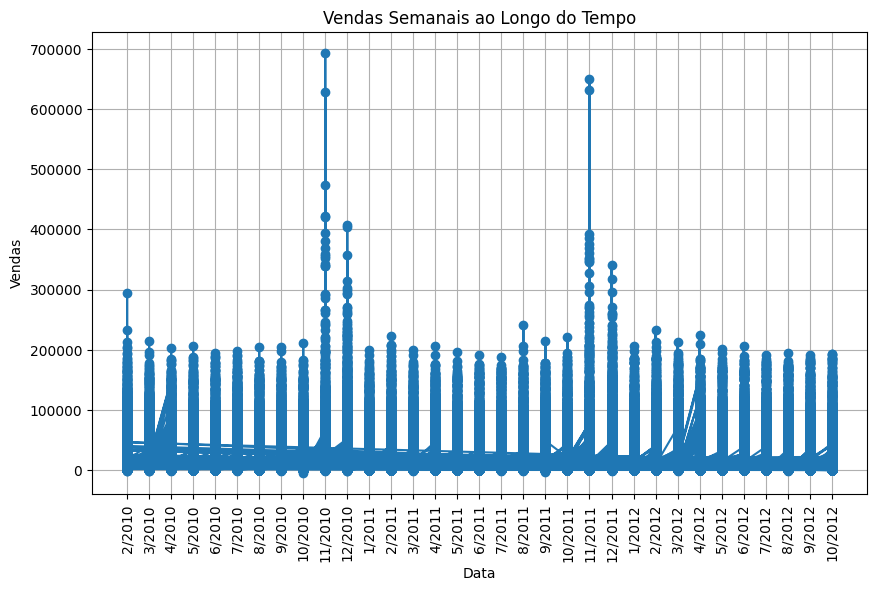

In [52]:
# Plotar gráfico de linha para visualizar padrões temporais
plt.figure(figsize=(10, 6))
plt.plot(df['data_completa'], df['Weekly_Sales'], marker='o')
plt.title('Vendas Semanais ao Longo do Tempo')
plt.xticks(rotation=90) 
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)

plt.show()


In [53]:
#setar só mês de novembro para ver qual foi a semana que mais vendeu
df_filtrado=df[df['Month']==11]
df_filtrado.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C,zscore,data_completa
2797,1,1,2010-11-05,34238.88,58.74,2.689,5347.45,192.0,24.6,1481.31,...,211.956394,7.838,2010,11,0,1,0,0,0.803905,11/2010
2798,1,2,2010-11-05,46381.43,58.74,2.689,5347.45,192.0,24.6,1481.31,...,211.956394,7.838,2010,11,0,1,0,0,1.338557,11/2010
2799,1,3,2010-11-05,9825.22,58.74,2.689,5347.45,192.0,24.6,1481.31,...,211.956394,7.838,2010,11,0,1,0,0,-0.271058,11/2010
2800,1,4,2010-11-05,37980.55,58.74,2.689,5347.45,192.0,24.6,1481.31,...,211.956394,7.838,2010,11,0,1,0,0,0.968656,11/2010
2801,1,5,2010-11-05,23903.81,58.74,2.689,5347.45,192.0,24.6,1481.31,...,211.956394,7.838,2010,11,0,1,0,0,0.348840,11/2010


In [54]:
df_filtrado['Date']

2797     2010-11-05
2798     2010-11-05
2799     2010-11-05
2800     2010-11-05
2801     2010-11-05
            ...    
418316   2011-11-25
418317   2011-11-25
418318   2011-11-25
418319   2011-11-25
418320   2011-11-25
Name: Date, Length: 23613, dtype: datetime64[ns]

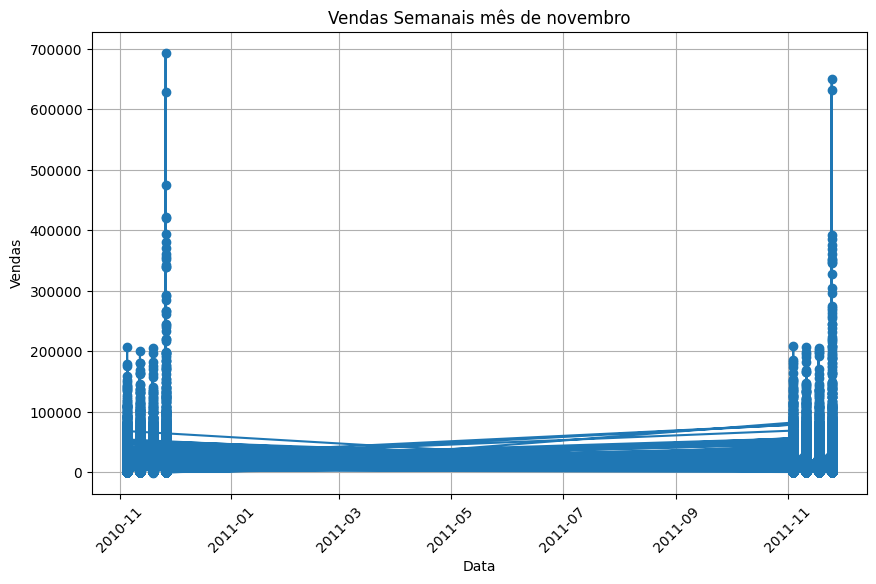

In [55]:
# Plotar gráfico de linha para visualizar padrões temporais
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado['Date'], df_filtrado['Weekly_Sales'], marker='o')
plt.title('Vendas Semanais mês de novembro')
plt.xticks(rotation=45) 
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)

plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_2176\1191323375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Date'] = df_filtrado['Date'].dt.strftime('%Y-%m-%d')


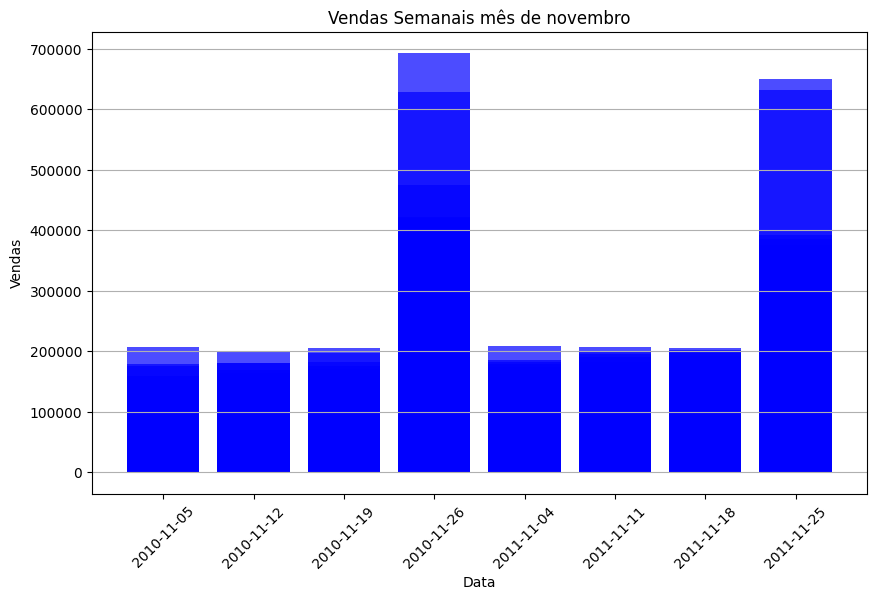

In [56]:
# Supondo que 'Date' seja do tipo datetime, você pode precisar converter para strings para melhor exibição
df_filtrado['Date'] = df_filtrado['Date'].dt.strftime('%Y-%m-%d')

plt.figure(figsize=(10, 6))
plt.bar(df_filtrado['Date'], df_filtrado['Weekly_Sales'], color='blue', alpha=0.7)
plt.title('Vendas Semanais mês de novembro')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(axis='y')

plt.show()


Os picos maiores de outliers foi em nov/2012, nov/2011 - black friday

Constatou-se que não é normal - vamos usar a normalização
Características da distribuição normal:

Simetria: A distribuição normal é simétrica em relação à sua média. Isso significa que metade dos dados está à esquerda da média e metade está à direita.

Média, Mediana e Moda iguais: Na distribuição normal, a média, mediana e moda são iguais e coincidem no ponto mais alto da curva.

Curva em forma de sino: A curva da distribuição normal é mais alta no centro e diminui suavemente em direção às extremidades, formando uma forma de sino.

Desvio Padrão: O desvio padrão controla a dispersão dos dados em relação à média. Um desvio padrão maior indica que os dados são mais dispersos em relação à média.

68-95-99.7 Rule (Regra 68-95-99.7): Esta regra empírica afirma que aproximadamente 68% dos dados estão dentro de um desvio padrão da média, 95% dentro de dois desvios padrão e 99.7% dentro de três desvios padrão.

In [57]:
#normalização
# Criar o objeto MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização e converter a matriz resultante de volta para um DataFrame
df_normalizado = pd.DataFrame(scaler.fit_transform(df_sem_data), columns=df_sem_data.columns)

# Exibir estatísticas descritivas do DataFrame normalizado
print(df_normalizado.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.481831       0.441432       0.030039       0.608122   
std         0.290575       0.311143       0.032533       0.180508   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.227273       0.173469       0.010126       0.476908   
50%         0.477273       0.367347       0.018051       0.627691   
75%         0.727273       0.744898       0.036091       0.746967   
max         1.000000       1.000000       1.000000       1.000000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.445404       0.067977       0.012283       0.003627   
std         0.229717       0.056852       0.048296       0.039019   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.230962       0.0603

Ver a diferença antes e depois da normalização e padronização


In [58]:
print(df_sem_data.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        3.361027    6026.195471    1021.307467     484.687953   
std         0.458515    5039.770624    5060.726828    5527.479863   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    5347.4500

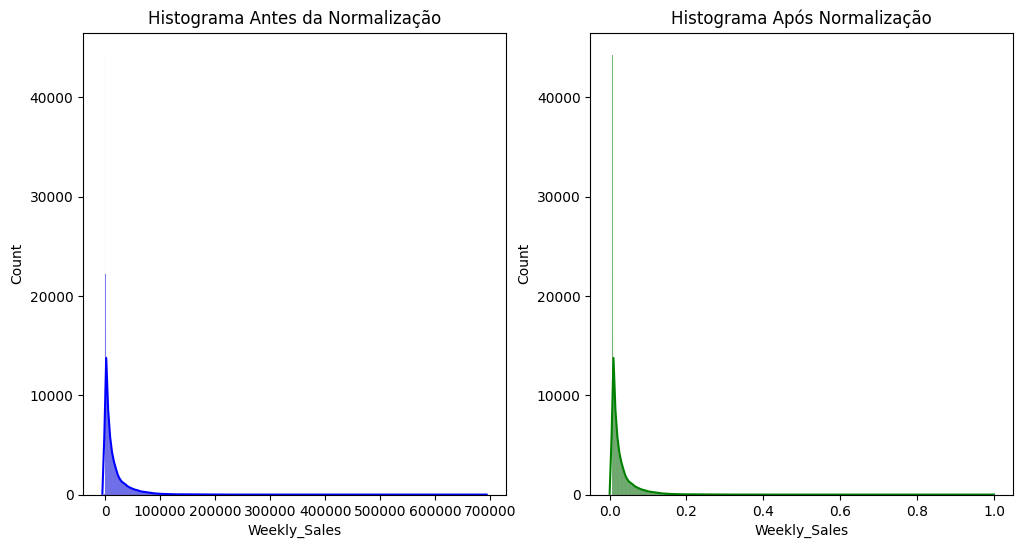

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_sem_data['Weekly_Sales'], kde=True, color='blue', label='Original')
plt.title('Histograma Antes da Normalização')

plt.subplot(1, 2, 2)
sns.histplot(df_normalizado['Weekly_Sales'], kde=True, color='green', label='Normalizado')
plt.title('Histograma Após Normalização')

plt.show()

1. Modelo

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C,zscore,data_completa
0,1,1,2010-02-05,24924.50,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,0.393782,2/2010
1,1,2,2010-02-05,50605.27,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,1.524538,2/2010
2,1,3,2010-02-05,13740.12,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,-0.098680,2/2010
3,1,4,2010-02-05,39954.04,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,1.055551,2/2010
4,1,5,2010-02-05,32229.38,42.31,2.572,5347.45,192.0,24.6,1481.31,NaN,211.096358,8.106,2010,2,0,1,0,0,0.715425,2/2010


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Melhorando o modelo

Feature Engineering:

Avalie se a inclusão de todas as variáveis é realmente necessária. Algumas variáveis podem não contribuir significativamente para a predição e podem ser removidas.
Considere criar novas features a partir das existentes se isso fizer sentido para o seu problema.
Seleção de Features:

Use técnicas de seleção de features para identificar as variáveis mais importantes. Métodos como a análise de importância de features, eliminação recursiva de features (RFE) ou seleção baseada em modelo podem ser úteis.
Regularização:

Considere a aplicação de técnicas de regularização, como L1 (Lasso) ou L2 (Ridge), para reduzir a complexidade do modelo e evitar overfitting.
Transformações de Variáveis:

Experimente transformações logarítmicas ou outras transformações nas variáveis para lidar com distribuições não lineares ou heterocedasticidade.
Interpretabilidade:

Se possível, interprete os coeficientes do modelo para entender a contribuição relativa de cada variável.
Considere a interpretabilidade ao selecionar features e decidir sobre a complexidade do modelo.
Validação Cruzada:

Use técnicas de validação cruzada para avaliar o desempenho do modelo de forma mais robusta.
Considere utilizar mais folds na validação cruzada para uma estimativa mais precisa do desempenho.
Experimentação com Outros Modelos:

Experimente outros algoritmos de regressão, como árvores de decisão, random forests, ou métodos mais avançados como gradient boosting.
Sintonização de Hiperparâmetros:

Realize uma sintonização de hiperparâmetros para encontrar os melhores valores para os parâmetros do seu modelo.
Tratamento de Outliers:

Avalie a presença de outliers e considere tratá-los adequadamente, removendo-os ou transformando os dados.

1. get the correlation coefficients of Y and each of our independent variables separately
iterate x in (number_of_explanatory_variables):

print(np.corrcoef(Y,train_set[‘COLUMN NAME’]))
the variables in increasing order of the magnitude of the correlation coefficien


![imagem](https://miro.medium.com/v2/resize:fit:1236/format:webp/1*ePMqfevdkn4GBgvsZKrCcw.png)

![coco](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZDWeg1VaHH84rxgwmcZ35Q.png
)

Adjusted-R-square is not always increasing; it is like a modified version of R-square in such a way that its value decreases if the addition of another independent variable did not improve the predictive power of the model as expected
Keep on adding the independent variables to the model until you find that the value of Adjusted-r-square has eventually started decreasing

1. Depois de limpar os dados

In [64]:
#demorou mt pq tem mts colunas
sns.pairplot(data=df, diag_kind='kde')

KeyboardInterrupt: 

1.Feature Encoding
In this step, we convert categorical variables — smoker, sex, and region — to numeric format(0, 1,2, 3, etc.) as most of the algorithms cannot handle non-numeric data. This process is called encoding and there are many ways to do this :

2. Feature Selection and Scaling

Next, we will select features that affect ‘charges’ the most. I have selected all the features except gender as its effect on ‘charges’ is very less(concluded from the viz charts above). These features will form our ‘X’ variable while charges will be our ‘y’ variable. If there are many features, I suggest you use scikit-learn’s SelectKBest for feature selection to arrive at the top features.

3. we need to ‘standardize’ the numeric ones — age, BMI, children.
Standardization process converts data to smaller values in the range 0 to 1 so that all of them lie on the same scale and one doesn’t overpower the other. I have used StandardScaler here.
#Scaling numeric features using sklearn StandardScalar
numeric=['age', 'bmi', 'children']
sc=StandardScalar()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [63]:
#escolher as melhores variáveis
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with predictor variables (X) and the target variable (y)
# Replace 'weekly_sales' with the actual name of your target variable

# Extract target variable (y)
y = df_normalizado['Weekly_Sales']

# Extract predictor variables (X)
X = df_normalizado.drop(columns=['Weekly_Sales'])  # Drop the target variable from X

# Example: Impute missing values with the mean
X.fillna(X.mean(), inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with f_regression (since it's a regression task)
k_best = SelectKBest(score_func=f_regression, k=5)  # Choose the number of top features (k) to select

# Fit and transform the feature matrix
X_train_k_best = k_best.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_features_indices = k_best.get_support(indices=True)

# Print the selected feature indices
print("Selected Feature Indices:", selected_features_indices)

# Transform the test set using the same selected features
X_test_k_best = k_best.transform(X_test)

# Train a model using the selected features
model = LinearRegression()
model.fit(X_train_k_best, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_k_best)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#dept, isHoliday,type_a,type_b

Selected Feature Indices: [ 0  1 14 15 16]
Mean Squared Error: 0.0010112688679691645


In [64]:
# Visualizar os índices das colunas
indices_colunas = df_normalizado.columns

# Visualizar os nomes das colunas
nomes_colunas = df_normalizado.columns.values

# Criar um dicionário de mapeamento de índices para nomes de colunas
mapeamento_indice_nome = {indice: nome for indice, nome in enumerate(nomes_colunas)}
print("Mapeamento de Índice para Nome de Coluna:", mapeamento_indice_nome)

Mapeamento de Índice para Nome de Coluna: {0: 'Store', 1: 'Dept', 2: 'Weekly_Sales', 3: 'Temperature', 4: 'Fuel_Price', 5: 'MarkDown1', 6: 'MarkDown2', 7: 'MarkDown3', 8: 'MarkDown4', 9: 'MarkDown5', 10: 'CPI', 11: 'Unemployment', 12: 'Year', 13: 'Month', 14: 'IsHoliday', 15: 'Type_A', 16: 'Type_B', 17: 'Type_C'}


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Dividir os dados em conjuntos de treinamento e teste


X=df_normalizado[['Dept','Temperature','IsHoliday','Type_A','Type_B']]
#X=df_normalizado[['Dept','Store']]
y=df_normalizado['Weekly_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir os resultados
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 0.00
R-squared (R2): 0.06


https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.48351954786118045, 0.011962481651853932, 0.023604561629775134)

3A. Feature Engineering

We can improve our model score by manipulating some of the features in the dataset. After a couple of trials, I found that the following items improve accuracy:

Grouping similar customers into clusters using KMeans.
Clubbing northeast and northwest regions into ‘north’ and southeast and southwest into ‘south’ in Region column.
Transforming ‘children’ into a categorical feature called ‘more_than_one_child’ which is ‘Yes’ if the number of children is > 1

From our EDA, we know that the distribution of ‘charges’ (Y) is highly skewed and hence we will apply scikit-learn’s target transformer — QuantileTransformer to normalize this behavior.

X=df[['age', 'bmi', 'smoker', 'more_than_1_child', 'cust_type', 'location_north', 'location_south']]
#Split test and train data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)
round(r2_score(y_test, yhat), 3), round(mean_absolute_error(y_test, yhat), 2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)
>>0.843, 2189.28, 4931.96

Yes! Our RandomForest model does perform well — MAE of 2078👍. Now, we will try with some boosting algorithms such as Gradient Boosting, LightGBM, and XGBoost.

testar esses algoritmos de aumento para ver se eles podem melhorar ainda mais a precisão do modelo em comparação com o modelo de Random Forest.

from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
import xgboost

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
 pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

5. Hyperparameter Tuning

Let’s tweak some of the algorithm parameters such as tree depth, estimators, learning rate, etc, and check for model accuracy. Manually trying out different combinations of parameter values is very time-consuming. Scikit-learn’s GridSearchCV automates this process and calculates optimized values for these parameters. I have applied GridSearch to the above 3 algorithms. Below is the one for XGBoost

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

Distribution and Residual plots confirm that there is a good overlap between predicted and actual charges. However, there are a handful of predicted values that are way beyond the x-axis and this makes our RMSE is higher. This can be reduced by increasing our data points i.e. collecting more data.